In [197]:
import pandas as pd
import numpy as np
import os
import json
import requests
from bs4 import BeautifulSoup as soup
import re
import matplotlib.pyplot as plt

#basic setup
base_dir = '/Users/TheBestKid/Desktop/Happyness'

#os.mkdir(os.path.join(base_dir, 'Constiution_Texts'))

#get happiness data
happiness_2015 = pd.read_csv(os.path.join(base_dir, 'world-happiness/2015.csv'))
happiness_2016 = pd.read_csv(os.path.join(base_dir, 'world-happiness/2016.csv'))
happiness_2017 = pd.read_csv(os.path.join(base_dir, 'world-happiness/2017.csv'))

In [198]:
happiness_2016 = happiness_2016.drop(['Region', 'Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)
happiness_2015 = happiness_2015.drop(['Region', 'Standard Error'], axis=1)
happiness_2017 = happiness_2017.drop(['Whisker.high', 'Whisker.low'], axis=1)

In [199]:
header = list(happiness_2015)

happiness_2017.columns = header

In [200]:
print(happiness_2015.shape)

(158, 10)


In [201]:
countries_2016 = []
for i in happiness_2016['Country']:
    countries_2016.append(str(i))
countries_2017 = []
for i in happiness_2017['Country']:
    countries_2017.append(str(i))

happiness_2015.set_index('Country', inplace=True)
happiness_2016.set_index('Country', inplace=True)
happiness_2017.set_index('Country', inplace=True)

In [202]:
header

['Country',
 'Happiness Rank',
 'Happiness Score',
 'Economy (GDP per Capita)',
 'Family',
 'Health (Life Expectancy)',
 'Freedom',
 'Trust (Government Corruption)',
 'Generosity',
 'Dystopia Residual']

In [203]:
for i in countries_2017:
    print(happiness_2017.loc[str(i)])

Happiness Rank                   1.000000
Happiness Score                  7.537000
Economy (GDP per Capita)         1.616463
Family                           1.533524
Health (Life Expectancy)         0.796667
Freedom                          0.635423
Trust (Government Corruption)    0.362012
Generosity                       0.315964
Dystopia Residual                2.277027
Name: Norway, dtype: float64
Happiness Rank                   2.000000
Happiness Score                  7.522000
Economy (GDP per Capita)         1.482383
Family                           1.551122
Health (Life Expectancy)         0.792566
Freedom                          0.626007
Trust (Government Corruption)    0.355280
Generosity                       0.400770
Dystopia Residual                2.313707
Name: Denmark, dtype: float64
Happiness Rank                   3.000000
Happiness Score                  7.504000
Economy (GDP per Capita)         1.480633
Family                           1.610574
Health (Life Expe

In [270]:
happiness =  {}
for h in header:
    happiness[h] = []



for index, c in happiness_2015.iterrows():
    print(index)
    in_num = 1
    values_2015 = {}
    values_2015['Country'] = index
    for h in header[1:]:
        values_2015[h] = c[h]
    values_2016 = {}
    values_2017 = {}
    
    if index in countries_2016:
        for h in header[1:]:
            print(h)
            values_2016[h] = happiness_2016.loc[index][h]
        countries_2016.remove(index)
        in_num += 1
        
    if index in countries_2017:
        print('in')
        for h in header[1:]:
            values_2017[h] = happiness_2017.loc[index][h]
        countries_2017.remove(index)
        in_num += 1
    for h in header[1:]:
        h_score = 0
        for i in (values_2015, values_2016, values_2017):
            if not (i == {}):
                h_score += i[h]
        h_score /= in_num
        happiness[h].append(h_score)
    happiness['Country'].append(str(index))
        
print(len(countries_2016))
print(len(countries_2017))

for c in countries_2016:
    in_num = 1
    values_2016 = {}
    values_2017 = {}
    values_2016['Country'] = c
    for h in header[1:]:
        values_2016[h] = happiness_2016.loc[c][h]
        
    for c in countries_2016:
        for h in header[1:]:
            values_2016[h] = happiness_2016.loc[c][h]
    
    if c in countries_2017:
        for h in header[1:]:
            values_2017[h] = happiness_2017.loc[c][h]
        countries_2017.remove(c)
    
    for h in header[1:]:
        h_score = 0
        for i in (values_2016, values_2017):
            if not (i == {}):
                h_score += i[h]
        h_score /= in_num
        happiness[h].append(h_score)
    happiness['Country'].append(str(index))
            
print(len(countries_2017))
for c in countries_2017:
    happiness['Country'].append(c)
    for h in header[1:]:
        happiness[h].append(happiness_2017.loc[c][h])
        
happiness

Switzerland
Iceland
Denmark
Norway
Canada
Finland
Netherlands
Sweden
New Zealand
Australia
Israel
Costa Rica
Austria
Mexico
United States
Brazil
Luxembourg
Ireland
Belgium
United Arab Emirates
United Kingdom
Oman
Venezuela
Singapore
Panama
Germany
Chile
Qatar
France
Argentina
Czech Republic
Uruguay
Colombia
Thailand
Saudi Arabia
Spain
Malta
Taiwan
Kuwait
Suriname
Trinidad and Tobago
El Salvador
Guatemala
Uzbekistan
Slovakia
Japan
South Korea
Ecuador
Bahrain
Italy
Bolivia
Moldova
Paraguay
Kazakhstan
Slovenia
Lithuania
Nicaragua
Peru
Belarus
Poland
Malaysia
Croatia
Libya
Russia
Jamaica
North Cyprus
Cyprus
Algeria
Kosovo
Turkmenistan
Mauritius
Hong Kong
Estonia
Indonesia
Vietnam
Turkey
Kyrgyzstan
Nigeria
Bhutan
Azerbaijan
Pakistan
Jordan
Montenegro
China
Zambia
Romania
Serbia
Portugal
Latvia
Philippines
Somaliland region
Morocco
Macedonia
Mozambique
Albania
Bosnia and Herzegovina
Lesotho
Dominican Republic
Laos
Mongolia
Swaziland
Greece
Lebanon
Hungary
Honduras
Tajikistan
Tunisia
Palestin

{'Country': ['Switzerland',
  'Iceland',
  'Denmark',
  'Norway',
  'Canada',
  'Finland',
  'Netherlands',
  'Sweden',
  'New Zealand',
  'Australia',
  'Israel',
  'Costa Rica',
  'Austria',
  'Mexico',
  'United States',
  'Brazil',
  'Luxembourg',
  'Ireland',
  'Belgium',
  'United Arab Emirates',
  'United Kingdom',
  'Oman',
  'Venezuela',
  'Singapore',
  'Panama',
  'Germany',
  'Chile',
  'Qatar',
  'France',
  'Argentina',
  'Czech Republic',
  'Uruguay',
  'Colombia',
  'Thailand',
  'Saudi Arabia',
  'Spain',
  'Malta',
  'Taiwan',
  'Kuwait',
  'Suriname',
  'Trinidad and Tobago',
  'El Salvador',
  'Guatemala',
  'Uzbekistan',
  'Slovakia',
  'Japan',
  'South Korea',
  'Ecuador',
  'Bahrain',
  'Italy',
  'Bolivia',
  'Moldova',
  'Paraguay',
  'Kazakhstan',
  'Slovenia',
  'Lithuania',
  'Nicaragua',
  'Peru',
  'Belarus',
  'Poland',
  'Malaysia',
  'Croatia',
  'Libya',
  'Russia',
  'Jamaica',
  'North Cyprus',
  'Cyprus',
  'Algeria',
  'Kosovo',
  'Turkmenistan',


In [271]:
happy = pd.DataFrame.from_dict(happiness)
happy = happy.sort_values(by='Happiness Score', ascending=False)
happy = happy.drop_duplicates(subset='Country', keep='first')
for index, row in happy.iterrows():
    row['Happiness Rank'] = index + 1
happy

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,1.0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,2.0,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,3.0,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,4.0,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,5.0,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,6.0,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,7.0,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,8.0,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,9.0,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,10.0,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [272]:
country_names = []
req_str = 'https://www.constituteproject.org/service/constitutions'
req = requests.get(req_str)
for i in json.loads(req.text):
    if i['in_force'] == True:
        country_names.append(i['country'])
country_names

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua_and_Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas_the',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia_and_Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei_Darussalam',
 'Bulgaria',
 'Burkina_Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape_Verde',
 'Central_African_Republic_the',
 'Chile',
 'China',
 'Colombia',
 'Comoros_the',
 'Democratic_Republic_of_the_Congo',
 'Congo_the',
 'Costa_Rica',
 'Cote_d_Ivoire',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech_Republic_the',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican_Republic_the',
 'Ecuador',
 'Egypt',
 'El_Salvador',
 'Equatorial_Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia__the',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'H

In [273]:
import country_converter as coco

all_countries = []
for i in happy['Country']:
    all_countries.append(str(i))
print(len(all_countries))
matches = coco.match(all_countries, country_names)
matches.values()

/anaconda3/lib/python3.6/site-packages/country_converter/country_converter.py:412: FutureWarning: read_table is deprecated, use read_csv instead.
  for str_col in must_be_string})


163


dict_values(['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands_the', 'Sweden', 'New_Zealand', 'Australia', 'Israel', 'Costa_Rica', 'Austria', 'Mexico', 'United_States_of_America', 'Brazil', 'Luxembourg', 'Ireland', 'Belgium', 'United_Arab_Emirates__the', 'United_Kingdom_of_Great_Britain_and_Northern_Ireland__the', 'Oman', 'Venezuela', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'France', 'Argentina', 'Czech_Republic_the', 'Uruguay', 'Colombia', 'Thailand', 'Taiwan', 'Saudi_Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname', 'Trinidad_and_Tobago', 'El_Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'not_found', 'Ecuador', 'Bahrain', 'Belize', 'Italy', 'Bolivia', 'Republic_of_Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Russian_Federation__the', 'Jamaica', 'Cyprus', 'Cyprus', 'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'not_found', 'not

In [274]:
#Get constitution data
constitutions_info = []
for country in matches:
    req_string = 'https://www.constituteproject.org/service/constitutions?country=' + matches[country]
    country_info = requests.get(req_string)
    constitutions_info.append(json.loads(country_info.text))

In [275]:
len(constitutions_info)

163

In [260]:
#Get all constitutions and write to a text file
texts_dir = os.path.join(base_dir, 'Constitutions')
copy_dir = os.path.join(base_dir, 'Copy')

In [265]:
#os.mkdir(copy_dir)
#os.mkdir(texts_dir)
for i in constitutions_info:
    if not (i == []):
        req_string = 'https://www.constituteproject.org/service/html?cons_id=' + i[0]['id'] + '&lang=en'
        con_html = requests.get(req_string)
        con_scraper = soup(con_html.text, 'html.parser')
        
        con_file_path = os.path.join(texts_dir, (i[0]['country'] + '.txt')) 
        copy_path = os.path.join(copy_dir, (i[0]['country'] + '.txt'))
        print(copy_path)
        
        con_file = open(con_file_path, 'w+')
        copy_file = open(copy_path, 'w+')
        
        text = con_scraper.get_text(strip=True).strip('{"html":').replace('\\n', '\n')
        con_file.write(text)
        copy_file.write(text)
        copy_file.close()
        con_file.close()

/Users/TheBestKid/Desktop/Happyness/Copy/Switzerland.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Iceland.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Denmark.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Norway.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Canada.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Finland.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Netherlands_the.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Sweden.txt
/Users/TheBestKid/Desktop/Happyness/Copy/New_Zealand.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Australia.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Israel.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Costa_Rica.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Austria.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Mexico.txt
/Users/TheBestKid/Desktop/Happyness/Copy/United_States_of_America.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Brazil.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Luxembourg.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Ireland.txt
/Users/TheB

/Users/TheBestKid/Desktop/Happyness/Copy/Guinea.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Cote_d_Ivoire.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Burkina_Faso.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Afghanistan.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Rwanda.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Benin.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Syrian_Arab_Republic_the.txt
/Users/TheBestKid/Desktop/Happyness/Copy/Burundi.txt


In [172]:
#Copy original files from copy to edited files in texts_dir

for i in os.listdir(copy_dir):
    c_f = open(os.path.join(copy_dir, i), 'r')
    og = c_f.read()
    c_f.close()
    
    f = open(os.path.join(texts_dir, i), 'w')
    f.write(og)
    f.close()

In [52]:
for i in os.listdir(texts_dir):
    f = open(os.path.join(texts_dir, i), 'rt', errors='surrogateescape')
    preamble = f.read().lower()
    start_index = 0
    end_index = 200
    f.close()
    
    try:
        start_index = preamble.index('preamble')
        try:
            end_index = preamble.index('1.')
        except ValueError:
            try:
                end_index = preamble.index('article 1')
            except ValueError:
                pass
    except ValueError:
        try:
            start_index = preamble.index('1.')
            end_index = preamble.index('2.')
        except ValueError:
            try:
                start_index = preamble.index('article 1')
                end_index = preamble.index('article 2')
            except:
                pass
        
    f = open(os.path.join(texts_dir, i), 'wt+', errors='ignore')
    pre = preamble[start_index:end_index]
    print(i + ': ' + str(start_index) + ', ' + str(end_index) + '(' + str(len(preamble)) + ')')
    f.write(pre)
    f.close()

Nepal.txt: 99, 1837(306074)
Turkey.txt: 192, 74165(234458)
Australia.txt: 92960, 988(120101)
Cameroon.txt: 88, 2003(73432)
Mozambique.txt: 264, 1799(220742)
Brazil.txt: 141, 107796(611132)
Benin.txt: 145, 83356(84869)
Greece.txt: 86, 237(207456)
Sweden.txt: 209, 3980(438530)
Burundi.txt: 99, 3442(135754)
Belgium.txt: 3997, 11928(156921)
Montenegro.txt: 90, 1393(95145)
.DS_Store: 0, 200(200)
Madagascar.txt: 202, 3989(113406)
Ecuador.txt: 111, 1597(439021)
Cyprus.txt: 1319, 1553(268732)
Gabon.txt: 109, 1295(83175)
Libya.txt: 109, 15372(22670)
Sierra_Leone.txt: 208, 411(321337)
Nigeria.txt: 87, 1087(533599)
Senegal.txt: 201, 28124(74499)
Malaysia.txt: 205, 481(488339)
Panama.txt: 86, 2883(201616)
Switzerland.txt: 312, 1225(184358)
Hungary.txt: 111, 5065(169602)
Iceland.txt: 173, 308(33754)
Poland.txt: 86, 2950(169591)
Kazakhstan.txt: 90, 759(114398)
Argentina.txt: 194, 36879(95163)
China.txt: 137, 25584(86115)
Venezuela.txt: 289, 13343(278297)
Liberia.txt: 75, 2206(86882)
Colombia.txt: 24

In [266]:
#Remove /n charachters
for file in os.listdir(texts_dir):
    f = open(os.path.join(texts_dir, file))
    text = f.read()
    
    f.close()
    text = text.replace('\n', '').replace('\r', '')
    print(text[0:200])
    
    f = open(os.path.join(texts_dir, file), 'w')
    f.write(text)
    f.close()


 "  Nepal 2006 (rev. 2012)    Historical                                    Preamble                      WE, THE SOVEREIGNTY AND STATE AUTHORITY INHERENT PEOPLE OF NEPAL,          Respecting the peop
 "  Turkey 1982 (rev. 2017)        Some of the 2017 amendments have not yet entered into force; see the final article for more information.                              Preamble                      A
 "  Australia 1901 (rev. 1985)                                      Commonwealth of Australia Constitution Act                      An Act to constitute the Commonwealth of Australia          WHEREAS 
 "  Cameroon 1972 (rev. 2008)                                      Preamble                      We, the people of Cameroon,          Proud of our linguistic and cultural diversity, an enriching featu
 "  Mozambique 2004 (rev. 2007)      Subsequently amended    English Translation of amended Article 304 \u00a9 2012 by William S. Hein & Co., Inc.  All rights reserved.Amendment translated by Jefr

404 Not Found404 Not FoundThe resource could not be found.
 "  Singapore 1963 (rev. 2016)                                      PART I. PRELIMINARY                                                      1. Citation                      This Constitution may be c
 "  Lebanon 1926 (rev. 2004)        \u00a9 Oxford University Press, Inc.Translated by Fouad Fahmy Shafik (constitution) and Abed Awad (Law No. 462)                              PART I. BASIC PROVISION
 "  India 1949 (rev. 2016)      Subsequently amended                                  Preamble                      WE, THE PEOPLE OF INDIA, having solemnly resolved to constitute India into a SOVEREI
 "  Peru 1993 (rev. 2009)      Subsequently amended                                  Preamble                      The Democratic Constituent Congress invoking Almighty God, obeying the mandate of the
404 Not Found404 Not FoundThe resource could not be found.
404 Not Found404 Not FoundThe resource could not be found.
 "  Malawi 1994 (re

In [341]:
'''train_dir = os.path.join(texts_dir, 'train')
try:
    os.mkdir(train_dir)
except:
    print('train_dir exists')'''
words = []
texts = []
labels = []
for index, row in happy.iterrows():
    file = open(os.path.join(texts_dir, re.sub(r"\s+", "_", row['Country']) + '.txt'), 'r')
    labels.append(row['Happiness Score'])
    texts.append(file.read())
    file.close()



In [342]:
import random

countries = list(happy['Country'])
combined = list(zip(labels, texts, countries))
random.shuffle(combined)


labels, texts, countries = zip(*combined)

In [344]:
countries

('Luxembourg',
 'United Kingdom',
 'Haiti',
 'South Africa',
 'Germany',
 'Guatemala',
 'Honduras',
 'Serbia',
 'Bosnia and Herzegovina',
 'Azerbaijan',
 'Canada',
 'Saudi Arabia',
 'Angola',
 'Argentina',
 'Burkina Faso',
 'Trinidad and Tobago',
 'Djibouti',
 'Israel',
 'Switzerland',
 'Czech Republic',
 'Senegal',
 'Taiwan Province of China',
 'Madagascar',
 'Bahrain',
 'Indonesia',
 'Nigeria',
 'Slovenia',
 'Nicaragua',
 'Burundi',
 'Guinea',
 'Japan',
 'Morocco',
 'Belize',
 'Singapore',
 'Suriname',
 'Iran',
 'Australia',
 'Kosovo',
 'Iraq',
 'Dominican Republic',
 'Ecuador',
 'Hong Kong S.A.R., China',
 'Colombia',
 'Namibia',
 'Niger',
 'Ukraine',
 'South Korea',
 'Slovakia',
 'Somaliland region',
 'Kyrgyzstan',
 'Italy',
 'Cyprus',
 'Panama',
 'Malawi',
 'Egypt',
 'Latvia',
 'Libya',
 'Somalia',
 'Chile',
 'China',
 'Armenia',
 'Bulgaria',
 'Pakistan',
 'Moldova',
 'Mali',
 'Bhutan',
 'Cameroon',
 'Russia',
 'Sierra Leone',
 'Brazil',
 'Comoros',
 'Gabon',
 'Tanzania',
 'Tunisi

In [345]:
#Tokenize constitutions
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

max_len = 10000
train_samples = 100
val_samples = 40
test_samples = 23

tokenizer = Tokenizer(num_words=10000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n1234567890', lower=True)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
data = pad_sequences(sequences, max_len)

data = tokenize(texts, max_words=max_len)
labels = np.asarray(labels)
print('data shape: ', data.shape)
print('labels shape: ', labels.shape)

x_train = data[:train_samples]
y_train = labels[:train_samples]

x_val = data[train_samples:train_samples + val_samples]
y_val = labels[train_samples:train_samples + val_samples]

x_test = data[train_samples + val_samples:train_samples + val_samples + test_samples]
y_test = labels[train_samples + val_samples:train_samples + val_samples + test_samples]


data shape:  (163, 10000)
labels shape:  (163,)


In [346]:
len(word_index)

22830

In [347]:
glove_dir = os.path.join(base_dir, 'glove.6B')

embedding_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coefs
f.close()
print('found word embeddings', len(embedding_index))

found word embeddings 400000


In [312]:
for word, i in word_index.items():
    print(i, word)
        

1 the
2 of
3 and
4 to
5 in
6 a
7 or
8 shall
9 be
10 by
11 for
12 any
13 as
14 article
15 is
16 law
17 that
18 with
19 may
20 on
21 this
22 not
23 president
24 state
25 court
26 national
27 other
28 constitution
29 such
30 which
31 public
32 an
33 from
34 u
35 office
36 person
37 under
38 republic
39 are
40 b
41 it
42 their
43 if
44 government
45 have
46 members
47 its
48 his
49 assembly
50 parliament
51 at
52 has
53 council
54 section
55 act
56 all
57 right
58 general
59 commission
60 who
61 no
62 provisions
63 rights
64 member
65 within
66 one
67 he
68 before
69 minister
70 election
71 than
72 accordance
73 been
74 case
75 federal
76 house
77 c
78 service
79 after
80 functions
81 constitutional
82 provided
83 time
84 order
85 subject
86 laws
87 must
88 authority
89 persons
90 justice
91 made
92 supreme
93 elected
94 part
95 exercise
96 two
97 power
98 i
99 d
100 period
101 will
102 those
103 appointed
104 powers
105 into
106 force
107 political
108 respect
109 they
110 judicial
111 es

1130 divided
1131 attend
1132 city
1133 accord
1134 pertuan
1135 even
1136 salaries
1137 submission
1138 languages
1139 fees
1140 agong
1141 repeal
1142 because
1143 prosecutions
1144 follows
1145 put
1146 references
1147 pensions
1148 constitutionality
1149 register
1150 delegate
1151 paper
1152 conflict
1153 vii
1154 develop
1155 sittings
1156 reserved
1157 decided
1158 programs
1159 interim
1160 limitations
1161 departments
1162 attained
1163 living
1164 nepal
1165 united
1166 proceed
1167 payable
1168 governed
1169 presence
1170 commercial
1171 contracts
1172 establishes
1173 proper
1174 names
1175 directions
1176 needs
1177 latter
1178 fifth
1179 n
1180 belonging
1181 movement
1182 pertaining
1183 exploitation
1184 serious
1185 heads
1186 found
1187 ethnic
1188 legally
1189 nations
1190 popular
1191 race
1192 sufficient
1193 suspend
1194 statutes
1195 periods
1196 specify
1197 exclusively
1198 god
1199 tried
1200 forth
1201 inviolable
1202 crown
1203 december
1204 just
1205 practi

2269 operative
2270 convocation
2271 project
2272 inclusive
2273 subjects
2274 continuance
2275 ratify
2276 alternative
2277 certified
2278 exclusion
2279 completion
2280 safeguarding
2281 independently
2282 agriculture
2283 prevail
2284 recognizes
2285 medium
2286 version
2287 namely
2288 practise
2289 funding
2290 raise
2291 excess
2292 conducting
2293 secondary
2294 xii
2295 classes
2296 prosecutor's
2297 pre
2298 draw
2299 poland
2300 exercisable
2301 deliver
2302 securing
2303 refusal
2304 confirmation
2305 mineral
2306 improve
2307 approving
2308 ministerial
2309 border
2310 storting
2311 remedy
2312 stating
2313 sooner
2314 derived
2315 transfers
2316 regards
2317 electorate
2318 begin
2319 interested
2320 recording
2321 abuja
2322 kyrgyz
2323 oral
2324 incapable
2325 summons
2326 eligibility
2327 grave
2328 domicile
2329 forming
2330 never
2331 africa
2332 administrator
2333 merit
2334 naturalization
2335 still
2336 whichever
2337 concurrence
2338 voluntary
2339 influence
2340 

3418 repugnant
3419 ecuadorian
3420 scale
3421 altering
3422 variation
3423 books
3424 summary
3425 wherever
3426 attack
3427 minutes
3428 villages
3429 markets
3430 designates
3431 invite
3432 levies
3433 fairly
3434 accession
3435 growth
3436 tie
3437 green
3438 elimination
3439 regularly
3440 fulfilling
3441 sharing
3442 partly
3443 accumulated
3444 incentives
3445 denomination
3446 logo
3447 partisan
3448 objected
3449 currently
3450 dpr
3451 rwanda
3452 estonian
3453 attributed
3454 vacates
3455 successive
3456 identical
3457 ensuing
3458 recommends
3459 resumed
3460 gratuities
3461 extradited
3462 cultures
3463 attain
3464 plebiscite
3465 negotiations
3466 impossible
3467 politics
3468 plaintiff
3469 reciprocity
3470 author
3471 criminally
3472 limiting
3473 lease
3474 ports
3475 transitory
3476 guard
3477 recorded
3478 registrars
3479 allocate
3480 occupied
3481 parish
3482 panchayats
3483 believe
3484 accredited
3485 alterations
3486 concurs
3487 profess
3488 rational
3489 equi

4700 indonesia
4701 mpr
4702 tripura
4703 mp
4704 thailand
4705 rwandan
4706 assessee
4707 greece
4708 togolese
4709 bulgarian
4710 romanian
4711 wef
4712 modifying
4713 colonies
4714 moving
4715 audience
4716 signify
4717 bye
4718 dependants
4719 oblasts
4720 preferences
4721 assessed
4722 curricula
4723 licensing
4724 lake
4725 machinery
4726 light
4727 invited
4728 professor
4729 worked
4730 postpone
4731 conjunction
4732 amnesties
4733 lots
4734 tied
4735 racism
4736 permitting
4737 austria
4738 authorizing
4739 applicants
4740 convenience
4741 levying
4742 outcome
4743 maintains
4744 planned
4745 reparation
4746 suspends
4747 voice
4748 putting
4749 discriminate
4750 trying
4751 denominations
4752 mandamus
4753 bearers
4754 archaeological
4755 late
4756 barracks
4757 discussions
4758 monitors
4759 acquires
4760 sheet
4761 fifteenth
4762 statistician
4763 remand
4764 practising
4765 sue
4766 reception
4767 guardians
4768 overthrow
4769 accurate
4770 notary
4771 invoking
4772 unpaid

5988 syndicates
5989 benefiting
5990 bureaus
5991 nullified
5992 grievances
5993 demonstrated
5994 contributing
5995 wrongful
5996 sat
5997 accreditation
5998 preparatory
5999 copyrights
6000 charity
6001 appeared
6002 ley
6003 uninterrupted
6004 puts
6005 alternation
6006 contractors
6007 invest
6008 restitution
6009 reformed
6010 protocols
6011 din
6012 interdiction
6013 gave
6014 et
6015 pleading
6016 patrimonial
6017 overtime
6018 salvadorans
6019 miles
6020 pacific
6021 hectares
6022 arguments
6023 projected
6024 expropriations
6025 algerian
6026 tangible
6027 needy
6028 unjustly
6029 eleventh
6030 drangpons
6031 performances
6032 domination
6033 merchant
6034 burkina
6035 transacted
6036 resigning
6037 juristic
6038 abridged
6039 uneven
6040 beaches
6041 newfoundland
6042 annum
6043 opposed
6044 perjury
6045 modernization
6046 resulted
6047 dissenting
6048 inasmuch
6049 realised
6050 transmissions
6051 equated
6052 automatic
6053 convict
6054 accompanying
6055 supplements
6056 di

7161 conciliatory
7162 edicts
7163 specialization
7164 eternal
7165 contemporary
7166 secularism
7167 loving
7168 tenets
7169 crescent
7170 extensively
7171 corporeal
7172 vagrant
7173 incite
7174 seize
7175 expropriate
7176 masses
7177 involuntary
7178 ideal
7179 unsuitable
7180 turks
7181 seventeenth
7182 manpower
7183 quickly
7184 vicinity
7185 keeper
7186 beforehand
7187 seizures
7188 covers
7189 george
7190 marries
7191 reign
7192 harmed
7193 regions'
7194 freed
7195 remanded
7196 confidentially
7197 juvenile
7198 intending
7199 abridges
7200 plenipotentiaries
7201 succeeded
7202 dissent
7203 grossly
7204 alignment
7205 delimit
7206 arriving
7207 advisor
7208 compete
7209 edge
7210 diversion
7211 macroeconomic
7212 pen
7213 proximity
7214 engineering
7215 motorways
7216 environmentally
7217 cultivate
7218 betting
7219 incarcerated
7220 collegial
7221 tariff
7222 graduated
7223 jefri
7224 superiority
7225 oppressed
7226 journey
7227 impunity
7228 dalit
7229 forthcoming
7230 misbeha

8293 repercussions
8294 split
8295 birthday
8296 accedes
8297 dispensation
8298 subsidised
8299 midst
8300 accountancy
8301 bicameral
8302 started
8303 slovakia
8304 mindful
8305 careful
8306 containers
8307 interrogate
8308 abode
8309 enhanced
8310 caring
8311 uniting
8312 splitting
8313 surrendering
8314 subpar
8315 empowers
8316 objecting
8317 standpoint
8318 accessory
8319 czech
8320 coll
8321 apartheid
8322 amenable
8323 overriding
8324 friends
8325 statal
8326 tribalism
8327 noting
8328 desist
8329 ultra
8330 vires
8331 dumping
8332 surpluses
8333 undistributed
8334 carmen
8335 gress
8336 conserving
8337 emancipation
8338 dialog
8339 specificities
8340 apprehend
8341 accomplishing
8342 invalidation
8343 sy
8344 fa
8345 credential
8346 analogy
8347 receivability
8348 augmentation
8349 versa
8350 remits
8351 fortnight
8352 auxiliaries
8353 postpones
8354 harmonize
8355 harmonization
8356 zurich
8357 basel
8358 appenzell
8359 sacrosanct
8360 musical
8361 nuisance
8362 dams
8363 wetl

9499 boost
9500 bolster
9501 kurdistan
9502 ba'athification
9503 tikhulu
9504 qatar
9505 qatari
9506 cjudge
9507 cservice
9508 curfew
9509 bahamas
9510 barbados
9511 tonga
9512 resists
9513 cmoney
9514 quashed
9515 unwilling
9516 misbehaves
9517 sparsely
9518 fledged
9519 seizing
9520 loco
9521 parentis
9522 humiliation
9523 monopolization
9524 pickets
9525 lofty
9526 reorganize
9527 countdown
9528 addenda
9529 'yes'
9530 innate
9531 addict
9532 basing
9533 cinema
9534 lockouts
9535 athletes
9536 founders
9537 supervisors
9538 dishonourable
9539 repeating
9540 sudden
9541 uprising
9542 destroying
9543 finalize
9544 cpresident
9545 ccouncil
9546 flanders
9547 liege
9548 blessing
9549 depositing
9550 indict
9551 reforming
9552 enshrines
9553 terminology
9554 originates
9555 thermal
9556 springs
9557 executions
9558 encircled
9559 song
9560 encompasses
9561 looks
9562 pieces
9563 outwardly
9564 disband
9565 hereinabove
9566 remanding
9567 czecho
9568 cherish
9569 shore
9570 orange
9571 in

10684 ibarapa
10685 ire
10686 longitude
10687 abaji
10688 bwari
10689 wave
10690 csub
10691 censuses
10692 conveniences
10693 bribe
10694 moments
10695 aide
10696 separates
10697 energies
10698 strictest
10699 demission
10700 reasoning
10701 interrogations
10702 diffused
10703 assembles
10704 luxembourgers
10705 inhabiting
10706 telegrams
10707 entre
10708 les
10709 encountered
10710 reconvened
10711 steadfastly
10712 insurgency
10713 scrutinize
10714 mon
10715 intimated
10716 replying
10717 sever
10718 deeming
10719 singly
10720 debar
10721 abusing
10722 learns
10723 syllabus
10724 homeless
10725 inscriptions
10726 dramatic
10727 valuation
10728 piracies
10729 jetties
10730 reservoirs
10731 toll
10732 banning
10733 manat
10734 abovementioned
10735 dire
10736 forcing
10737 epidemiological
10738 suspicions
10739 benefited
10740 luis
10741 forefathers
10742 diligences
10743 faltas
10744 persona
10745 reeducation
10746 tortures
10747 imputable
10748 inhabits
10749 fallo
10750 dossiers
107

11847 upgrade
11848 pluricultural
11849 planet
11850 watersheds
11851 buoyancy
11852 condemns
11853 chambre
11854 ba'ath
11855 baghdad
11856 kishlaks
11857 auls
11858 kenes
11859 interdistrict
11860 kenghash
11861 emalangeni
11862 indlovukazi
11863 umbutfo
11864 bantfwabenkhosi
11865 hungary's
11866 enshrine
11867 cterritorial
11868 ctrinidad
11869 inexpedient
11870 calien
11871 cbritish
11872 reciting
11873 undisputed
11874 undertook
11875 sociology
11876 interact
11877 undignified
11878 personify
11879 jeopardizes
11880 basics
11881 months'
11882 joy
11883 ankara
11884 perpetrate
11885 mal
11886 killing
11887 quelling
11888 necessitating
11889 belongings
11890 urbanization
11891 obstructing
11892 accessing
11893 cultivates
11894 reciprocally
11895 workplaces
11896 strikers
11897 vices
11898 intensity
11899 deprival
11900 revealing
11901 quaestors
11902 abided
11903 bequeathed
11904 renews
11905 rapporteurs
11906 contention
11907 revaluation
11908 impositions
11909 explored
11910 burn

13175 personalized
13176 incorporates
13177 supervening
13178 describes
13179 approbation
13180 causation
13181 heeded
13182 petroleos
13183 coastline
13184 manufacturers
13185 typical
13186 abatements
13187 repercussion
13188 instrumental
13189 signers
13190 belt
13191 apure
13192 zulia
13193 sucre
13194 concessionaire
13195 bloodshed
13196 perspectives
13197 rectangle
13198 fictional
13199 hiv
13200 laborer
13201 peer
13202 cbefore
13203 compositions
13204 largely
13205 ceni
13206 twa
13207 optation
13208 lecture
13209 perpetrates
13210 plays
13211 reinforces
13212 etat
13213 emitting
13214 storing
13215 uganda's
13216 genuineness
13217 fountain
13218 dishonestly
13219 peruse
13220 hoima
13221 jinja
13222 gulu
13223 lira
13224 calibre
13225 mailo
13226 bonafide
13227 registrable
13228 reservoir
13229 shale
13230 clay
13231 rwenzori
13232 tororo
13233 madi
13234 bunagana
13235 nyarugando
13236 giseke
13237 lubona
13238 kirambo
13239 northernmost
13240 elbow
13241 kaku
13242 rutshuru
1

14383 aalim
14384 azad
14385 oa
14386 enunciates
14387 rawalpindi
14388 dera
14389 ismail
14390 sibi
14391 versed
14392 csenior
14393 amb
14394 tehsil
14395 waziristan
14396 gallantry
14397 secondments
14398 milling
14399 uncertainty
14400 remarries
14401 millennial
14402 pragmatic
14403 seashore
14404 instantly
14405 kuwait's
14406 mainstays
14407 session's
14408 ministry's
14409 determinate
14410 warranties
14411 indebting
14412 vigilante
14413 ie
14414 disadvantageous
14415 gic
14416 temasek
14417 jurong
14418 sp
14419 posthumous
14420 sustainably
14421 zambian
14422 cyoung
14423 cdisciplinary
14424 cdisciplined
14425 outlining
14426 cbill
14427 cemoluments
14428 chigh
14429 cordinarily
14430 cpresidential
14431 cproperty
14432 creturning
14433 cleansing
14434 constantinople
14435 synodal
14436 synod
14437 sufferer
14438 cadastre
14439 woody
14440 biocoenosis
14441 militaries
14442 burdening
14443 detachments
14444 unsalaried
14445 pacha
14446 mama
14447 alfaro
14448 dairy
14449 deg

15675 barrows
15676 slabs
15677 pets
15678 kiosks
15679 bakeries
15680 laundries
15681 businessman
15682 cassets
15683 cbusiness
15684 adventure
15685 cemolument
15686 cliabilities
15687 quantifiable
15688 humiliated
15689 mistreated
15690 telematics
15691 dispossession
15692 specialties
15693 soveriegnty
15694 cgreen
15695 cla
15696 concorde
15697 cunion
15698 cmother
15699 libreville
15700 previsioned
15701 misfortune
15702 vic
15703 redrawn
15704 disapprobation
15705 reuse
15706 intercession
15707 oversteps
15708 scenario
15709 annexation
15710 finalizes
15711 nassau
15712 plac
15713 nuptial
15714 benediction
15715 exprimer
15716 ducal
15717 chateau
15718 berg
15719 esch
15720 alzette
15721 capellen
15722 mersch
15723 diekirch
15724 redange
15725 wiltz
15726 clervaux
15727 vianden
15728 grevenmacher
15729 remich
15730 echternach
15731 mains
15732 charger
15733 demande
15734 vbis
15735 arrt
15736 titre
15737 prejudiciel
15738 importante
15739 bdtiment
15740 grevant
15741 traitment
15

16673 asservissement
16674 waghf
16675 repressed
16676 engendered
16677 exp
16678 dition
16679 oevre
16680 ordre
16681 tablissement
16682 nale
16683 carbons
16684 cis
16685 rel
16686 avant
16687 passe
16688 outre
16689 paritaire
16690 renvoie
16691 semestre
16692 charg
16693 entra
16694 eene
16695 partage
16696 nuire
16697 leur
16698 parmi
16699 mis
16700 democracies
16701 transparence
16702 moralize
16703 mistreatments
16704 tribalist
16705 ditanye
16706 progres
16707 ces
16708 consecrating
16709 xivbis
16710 xivter
16711 abbreviated
16712 csc
16713 pleine
16714 aright
16715 trafficker
16716 unextracted
16717 'criminal
16718 stepchild
16719 'discriminatory
16720 in'
16721 forte
16722 beheld
16723 'period
16724 christopher
16725 cessio
16726 bonorum
16727 the'
16728 placard
16729 shaft
16730 which'
16731 'opposition
16732 'acting
16733 benefits'
16734 trivia
16735 'action'
16736 'debt
16737 charges'
16738 agalega
16739 tromelin
16740 cargados
16741 carajos
16742 chagos
16743 diego
1674

17825 testigos
17826 patos
17827 seacoasts
17828 nullifying
17829 mistreat
17830 negating
17831 weighed
17832 fraganti
17833 reposes
17834 concealers
17835 tolerated
17836 tolerates
17837 summates
17838 evading
17839 adoptee
17840 puerperal
17841 humanize
17842 meager
17843 housewives
17844 intactness
17845 garnishment
17846 simulation
17847 memories
17848 idiosyncrasies
17849 subtitles
17850 nonacademic
17851 illicitly
17852 genome
17853 patentable
17854 ozone
17855 misapplication
17856 amicably
17857 finest
17858 bier
17859 mintage
17860 cigarettes
17861 aliquot
17862 penological
17863 inmunidad
17864 assuagements
17865 oyster
17866 expressways
17867 neglecting
17868 plazas
17869 ornament
17870 vehicular
17871 pedestrian
17872 spectacles
17873 healthiness
17874 sewers
17875 unbalances
17876 probative
17877 nonpublic
17878 pantheon
17879 heeding
17880 cfulfillment
17881 stewardship
17882 activism
17883 nonessential
17884 accusatory
17885 delegitimization
17886 penologists
17887 catalo

18867 tiri
18868 coated
18869 lateral
18870 halved
18871 leopards
18872 interlaced
18873 qolobaa
18874 calankeed
18875 aden
18876 thecitizen
18877 impairs
18878 seekers
18879 payer
18880 somalia's
18881 dumped
18882 inthe
18883 interactions
18884 penalised
18885 finalise
18886 shari'a
18887 tasking
18888 implicate
18889 revenge
18890 triggers
18891 outright
18892 mercilessness
18893 align
18894 worldwide
18895 'oversight
18896 committee'
18897 'review
18898 seemingly
18899 subtract
18900 redrafting
18901 nominees'
18902 predicts
18903 galkayo
18904 elicit
18905 obscure
18906 bharat
18907 migrants
18908 tanks
18909 ghats
18910 unaided
18911 begar
18912 throwing
18913 kirpans
18914 jaina
18915 treasurers
18916 jagir
18917 inam
18918 muafi
18919 cultivators
18920 cows
18921 calves
18922 milch
18923 draught
18924 creatures
18925 rises
18926 renomination
18927 chhattisgarh
18928 jharkhand
18929 pleaders
18930 ixb
18931 zi
18932 zj
18933 zl
18934 stalemate
18935 zm
18936 zn
18937 zo
18938 zp

20090 unofficially
20091 permissibility
20092 equalise
20093 extrabudgetary
20094 bundestag's
20095 diverge
20096 expellee
20097 denazification
20098 telekom
20099 averaging
20100 untouched
20101 fullfils
20102 redevelopment
20103 ossetia
20104 geodesy
20105 cartography
20106 harbors
20107 cordon
20108 lazika
20109 abkhazian
20110 possessors
20111 thoroughfare
20112 propagandise
20113 stir
20114 incontrovertible
20115 familiars
20116 kutaisi
20117 truce
20118 sakrebulos
20119 parameter
20120 dislocation
20121 concretely
20122 enthroned
20123 forbade
20124 contend
20125 subsidizes
20126 eradicated
20127 doer
20128 dissolute
20129 equipments
20130 vitally
20131 refine
20132 tandem
20133 accountably
20134 vet
20135 patronize
20136 emphasizes
20137 learners
20138 consistence
20139 perseveration
20140 altogether
20141 disfranchised
20142 novice
20143 brahmin
20144 patty
20145 wealthiness
20146 afterward
20147 fielded
20148 gazetteer
20149 tv
20150 advertisers
20151 telecasters
20152 cunusua

21212 warranting
21213 blasphemous
21214 seditious
21215 especial
21216 enforcer
21217 demonstrators
21218 intelligibility
21219 builds
21220 tigray
21221 afar
21222 amhara
21223 benshangul
21224 gumuz
21225 gambela
21226 harari
21227 meskerem
21228 sene
21229 misunderstandings
21230 negarit
21231 gazeta
21232 advantaged
21233 usufractuary
21234 undesignated
21235 parliamentarism
21236 jeopardise
21237 employability
21238 offensively
21239 petitionary
21240 replied
21241 credibility
21242 shareholdings
21243 purviews
21244 evangelic
21245 readopt
21246 leoneans
21247 inclination
21248 highlight
21249 miner
21250 airforce
21251 cowner
21252 headquarter
21253 cassociation
21254 accreditted
21255 retaken
21256 unseating
21257 freetown
21258 sherbro
21259 bo
21260 occurence
21261 ninetieth
21262 leones
21263 juryman
21264 leon
21265 ccustomary
21266 cchiefdom
21267 csierra
21268 enpowering
21269 emuloment
21270 recommenced
21271 reprinted
21272 britannic
21273 niaka
21274 excellency
21275 

22447 patients
22448 universalizing
22449 addictions
22450 problematic
22451 chores
22452 channeled
22453 shelters
22454 festive
22455 plundered
22456 sportspersons
22457 arenas
22458 democratize
22459 vulnerabilities
22460 tackle
22461 conserves
22462 intangibility
22463 immediateness
22464 transgenic
22465 biotechnologies
22466 synthetics
22467 priceless
22468 subsystems
22469 fragile
22470 moorlands
22471 cloud
22472 dry
22473 wet
22474 mangroves
22475 fertile
22476 revegetation
22477 ecosystemic
22478 greenhouse
22479 emissions
22480 motorized
22481 bike
22482 lanes
22483 raids
22484 multipolar
22485 nonrestriction
22486 breakthroughs
22487 regressivity
22488 consolidates
22489 mostly
22490 arbitrate
22491 invitations
22492 eliminatory
22493 regularize
22494 instructors
22495 shopping
22496 hydropower
22497 paute
22498 pisayambo
22499 agoyan
22500 azuay
22501 canar
22502 morona
22503 tungurahua
22504 outsource
22505 groundwork
22506 disposable
22507 rim
22508 mum
22509 multiperson


In [348]:
embedding_dim = 100

embedding_matrix = np.zeros((max_len, embedding_dim))
print(embedding_matrix.shape)
for word, i in word_index.items():
    if i < max_len:
        embedding_vector = embedding_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

(10000, 100)


In [405]:
#Model
from keras.models import Sequential
import keras.layers as layers
import keras.optimizers as optimizers
from keras import regularizers
def build_model():
    model = Sequential()
    model.add(layers.Embedding(max_len, embedding_dim, input_length=max_len))
    '''model.add(layers.Dropout(0.2))
    model.add(layers.Conv1D(32, 7, activation='relu'))
    model.add(layers.Dropout(0.4))
    model.add(layers.MaxPooling1D(5))
    model.add(layers.Conv1D(32, 7, activation='relu')) '''
    model.add(layers.LSTM(32))
    model.add(layers.Dense(1))
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False
    model.compile(optimizer=optimizers.RMSprop(), loss='mse', metrics=['mae'])
    return model

In [273]:
x_train.shape

(90, 10000)

In [ ]:
# Use k-folding
k = 5
val_samples = len(data) // k
epochs = 30
all_scores = []

for i in range(k):
    print('proccessing fold number: ' + str(i) + '\n')
    val_x = data[(i * val_samples):(i+1) * val_samples]
    val_y = labels[(i * val_samples):(i+1) * val_samples]
    
    train_x = np.concatenate(
        [data[:i*val_samples],
        data[(i+1)*val_samples:]],
        axis=0)
    
    train_y = np.concatenate(
        [labels[:i*val_samples],
        labels[(i+1)*val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(train_x, train_y, epochs=epochs, batch_size=5)
    val_mse, val_mae = model.evaluate(val_x, val_y)
    all_scores.append(val_mae)

In [407]:
model = build_model()
model.fit(data, labels, epochs=15, batch_size=10)

Epoch 1/15
163/163 [==============================] - 135s 830ms/step - loss: 12.2478 - mean_absolute_error: 3.1461
Epoch 2/15
163/163 [==============================] - 131s 806ms/step - loss: 2.1806 - mean_absolute_error: 1.2043
Epoch 3/15
163/163 [==============================] - 133s 816ms/step - loss: 1.2874 - mean_absolute_error: 0.9253
Epoch 4/15
163/163 [==============================] - 131s 805ms/step - loss: 1.2457 - mean_absolute_error: 0.9111
Epoch 5/15
163/163 [==============================] - 128s 788ms/step - loss: 1.2072 - mean_absolute_error: 0.9173
Epoch 6/15
163/163 [==============================] - 132s 811ms/step - loss: 1.2199 - mean_absolute_error: 0.9053
Epoch 7/15
163/163 [==============================] - 131s 806ms/step - loss: 1.1541 - mean_absolute_error: 0.8881
Epoch 8/15
163/163 [==============================] - 133s 814ms/step - loss: 1.1583 - mean_absolute_error: 0.8853
Epoch 9/15
163/163 [==============================] - 133s 814ms/step - loss: 1

In [416]:
history = model.history
history.history

{'loss': [12.247784863220403,
  2.1806224270100976,
  1.2873753100816459,
  1.245699191385983,
  1.2072471182770523,
  1.2199401336213562,
  1.1541168463924911,
  1.158264611030649,
  1.1639568798381126,
  1.1250824800298258,
  1.075889968433263,
  1.0656417813037802,
  1.0426098437397027,
  1.033067667456858,
  1.049559412558386],
 'mean_absolute_error': [3.146123646958474,
  1.2042919280338873,
  0.9252817619797642,
  0.9111154467050283,
  0.9172640051578451,
  0.9053301079872927,
  0.8880611621529046,
  0.8853441209880852,
  0.8869501198727661,
  0.8529021959363318,
  0.8498771263777845,
  0.8426810678528862,
  0.8371108174324036,
  0.8282293203783913,
  0.8290430150149058]}

<function matplotlib.pyplot.show(*args, **kw)>

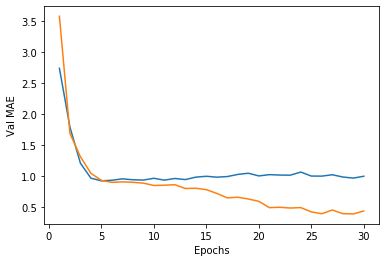

In [378]:
plt.plot(range(1, 31), history.history['val_mean_absolute_error'])
plt.plot(range(1, 31), history.history['mean_absolute_error'])
plt.xlabel('Epochs')
plt.ylabel('Val MAE')
plt.show

In [417]:
#Make a prediction
results = model.evaluate(x_test, y_test)

23/23 [==============================] - 2s 74ms/step


In [418]:
results

[1.2410125732421875, 0.9091567993164062]

In [419]:
predict = model.predict(data)

In [420]:
len(predict)

163

Text(0, 0.5, 'mae')

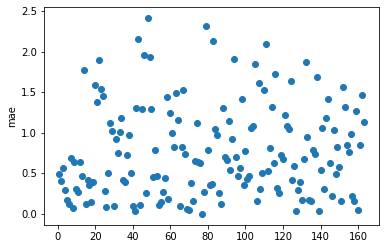

In [421]:
predictions = np.zeros(len(predict))

for i in range(len(predict)):
    predictions[i] = predict[i][0]
    
c_p_a = zip(countries, labels, predictions)
c_p_a = sorted(c_p_a, key=lambda x: x[2])
mae = []
for i in c_p_a:
    mae.append(abs(i[1]-i[2]))

plt.scatter(range(1, len(mae) + 1), mae)
plt.ylabel('mae')

Text(0.5, 0, 'Actual')

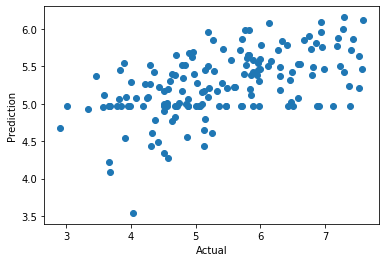

In [422]:
plt.scatter(labels, predictions)
plt.ylabel('Prediction')
plt.xlabel('Actual')

In [423]:
np.sort(predictions)

array([3.54183674, 4.09135342, 4.22123766, 4.27954865, 4.33616543,
       4.43084097, 4.43999672, 4.49042797, 4.54930401, 4.55736065,
       4.60457754, 4.60919762, 4.65383148, 4.67933846, 4.7654233 ,
       4.78585243, 4.79556036, 4.82885695, 4.90456676, 4.92425156,
       4.95785761, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.96639252, 4.96639252, 4.96639252, 4.96639252,
       4.96639252, 4.9758091 , 4.9908123 , 4.99606705, 4.99864435,
       5.00750351, 5.00893021, 5.03082943, 5.05774879, 5.06054068,
       5.07646179, 5.08252811, 5.08282661, 5.09154749, 5.09327841,
       5.09713745, 5.11284733, 5.11320686, 5.16354942, 5.16579342,
       5.16688681, 5.17100239, 5.17188406, 5.18117619, 5.19441